In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Functions, lambda functions, and reading help documents

We are going to introduce a few more python concepts. If you've been working through the NHANES example notebooks, you will have seen these in use already. There is a lot to say about these new concepts, but we will only be giving a brief introduction to each. For more information, follow the links provided or do your own search for the many great resources available on the web.  

### Functions

If you use a snippet of code multiple times, it is best practice to put that code into a function instead of copying and pasting it. For example, if you wanted several of the same plots with different data, you could create a function that returns that style of plot for arbitrary (though with correct dimension and type) data. 

In Python, indentation is very important. If done incorrectly, your code will not run and instead will give an error. When defining a function, all code after the ':' must be indented properly. The indentation conveys the scope of the code. [Some further explanation](https://docs.python.org/2.0/ref/indentation.html).
```
def function_name(arguments):
    """
    Header comment: brief description of what this function does
    
    Args:
        obj: input for this function
    Returns:
        out: the output of this function
    """
    
    some code
    
    return out 
 ```
 
 Exactly how to structure the header comments is up to you if you work alone, or will likely be specified if working for an established company. 
 
Function names should start with a lower case letter (they cannot start with a number), and can be in *camelCase or snake_case*.

If your function returns a variable, you use 'return' to specify that variable. **A function doesn't always have to return something though**. For example, you could have a function that creates a plot and then saves it in the current directory. 

In [2]:
def sum_x_y(x, y): # don't need comments if immediately clear what the function does
    out = x + y
    return out

sum_x_y(4, 6)

10

In [3]:
def get_max(x):
    """
    Gets the maximum element of the list 'x'
    
    Args:
        x a list of integer or floats
    
    Returns:
        the largest element of x
    """
    current_max = x[0]
    for i in x[1:]:
        if i > current_max:
            current_max = i
    return current_max

In [4]:
get_max(np.random.choice(400, 100)) 
# np.random.choice(400, 100) will randomly choose 100 integers between 0 and 400       

399

There is a lot more to be said about functions that we don't have time to cover in this course, so I leave you with examples of [common gotchas](https://docs.python-guide.org/writing/gotchas/) that you may run into.

### lambda functions

There are also know as **anonymous functions** because they are unnamed. This function can have any number of arguments but only one expression. **Lambda functions, unlike defined functions, always return a variable**.
The format of a lambda function is  
```
lambda arguments: expression  
```

They can look similar to a mathematical expression for evauating a function.  
For example:
```
(lambda x: x**2)(3)
```
Is the same as mathmatically writing  
$f(x) = x^2$ an then evauluating the function $f$ at $x=3$,  
$f(3) = 9$

In [5]:
(lambda x: x**2)(3)

9

In [6]:
(lambda x, y: x + y)(4, 6)

10

Another way to use a lambda function is to store it in a variable like in the example below.

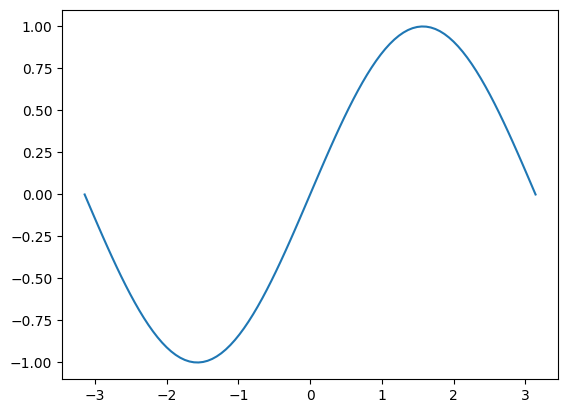

In [8]:
f = lambda x: np.sin(x)
x = np.linspace(-np.pi, np.pi, 100)
y = [f(i) for i in x]
plt.plot(x, y)
plt.show;
# we could have made this several ways, can you think of another?

You shouldn't come across many (if any) cases where you would have to use a lambda function, but we present them briefly here so that you can regonize them in the wild. 

### Reading help documentation
A key skill in being a successful programmer is being able to read the documentation for a function and understand what that functions does and what the arguments are. 

To get the documentation, use the help function. First, let's call the help function on help, to see what is does:

In [9]:
help(help)

Help on _Helper in module _sitebuiltins object:

class _Helper(builtins.object)
 |  Define the builtin 'help'.
 |  
 |  This is a wrapper around pydoc.help that provides a helpful message
 |  when 'help' is typed at the Python interactive prompt.
 |  
 |  Calling help() at the Python prompt starts an interactive help session.
 |  Calling help(thing) prints help for the python object 'thing'.
 |  
 |  Methods defined here:
 |  
 |  __call__(self, *args, **kwds)
 |      Call self as a function.
 |  
 |  __repr__(self)
 |      Return repr(self).
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



We can see that calling help(thing) will print the documentation for 'thing'. Generally, this documentation will first list the function with its arguments (also called parameters), showing what the default arguments are. Then, it will list these arguments (parameters) and specify what they are and their type. Then it will documents what the function returns, errors it may raise, and possibly other documentation as necessary. Often, the bottom of the document will contain examples.

Let's look at another example, the pandas drop function. This is used to drop rows or columns from a DataFrame. If you had a DataFrame call 'my_df', you would call this function by
```
my_df.drop(some arguments)
```
Unfortunately, we cannot simply call 
```
help(drop)
```
because drop is not a function in base python. Instead, we must call
```
help(pd.DataFrame.drop)
```
because we need to specify that this is from pandas library (pd) and is applied to a DataFrame. If you're wondering why I'm capitalizing DataFrame as such, it is because that is a data type in the python pandas library. Without the capitalization, it had no meaning. 

In [10]:
help(pd.DataFrame.drop)

Help on function drop in module pandas.core.frame:

drop(self, labels: 'IndexLabel' = None, *, axis: 'Axis' = 0, index: 'IndexLabel' = None, columns: 'IndexLabel' = None, level: 'Level' = None, inplace: 'bool' = False, errors: 'IgnoreRaise' = 'raise') -> 'DataFrame | None'
    Drop specified labels from rows or columns.
    
    Remove rows or columns by specifying label names and corresponding
    axis, or by specifying directly index or column names. When using a
    multi-index, labels on different levels can be removed by specifying
    the level. See the `user guide <advanced.shown_levels>`
    for more information about the now unused levels.
    
    Parameters
    ----------
    labels : single label or list-like
        Index or column labels to drop. A tuple will be used as a single
        label and not treated as a list-like.
    axis : {0 or 'index', 1 or 'columns'}, default 0
        Whether to drop labels from the index (0 or 'index') or
        columns (1 or 'columns').

If you wanted to drop the column 'this one' from the DataFrame 'my_df', how would you do it?